# Importing Libraries

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [4]:
matches_df = pd.read_csv("matches.csv")
score_df = pd.read_csv("deliveries.csv")

In [5]:
matches_df.head(n=3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [6]:
score_df.head(n=3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [7]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# DATA ANALYSIS OUTCOMES

# Most number of wins in IPL

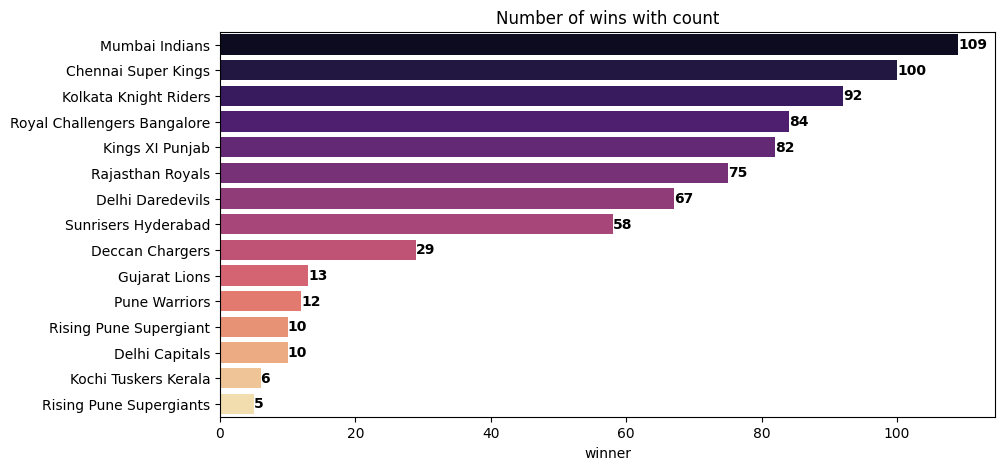

In [24]:
plt.figure(figsize=(10,5))
data = matches_df.winner.value_counts()
ax = sns.barplot(y=data.index, x=data, palette='magma')

for i, count in enumerate(data):
    ax.text(count, i, str(count), va='center', fontsize=10, color='black', fontweight='bold')

plt.title('Teams with most wins in IPL')
plt.show()

# Champions-season wise

In [28]:
finals=matches_df.drop_duplicates(subset=['season'],keep='last')
finals[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


# Highest number of Trophies in IPL

In [29]:
finals['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

# Player of match in Finals winning side

In [30]:
finals[['winner','player_of_match','season']].reset_index(drop=True)

,winner,player_of_match,season
0,Mumbai Indians,KH Pandya,2017
1,Rajasthan Royals,YK Pathan,2008
2,Deccan Chargers,A Kumble,2009
3,Chennai Super Kings,SK Raina,2010
4,Chennai Super Kings,M Vijay,2011
5,Kolkata Knight Riders,MS Bisla,2012
6,Mumbai Indians,KA Pollard,2013
7,Kolkata Knight Riders,MK Pandey,2014
8,Mumbai Indians,RG Sharma,2015
9,Sunrisers Hyderabad,BCJ Cutting,2016


# Most runs in IPL

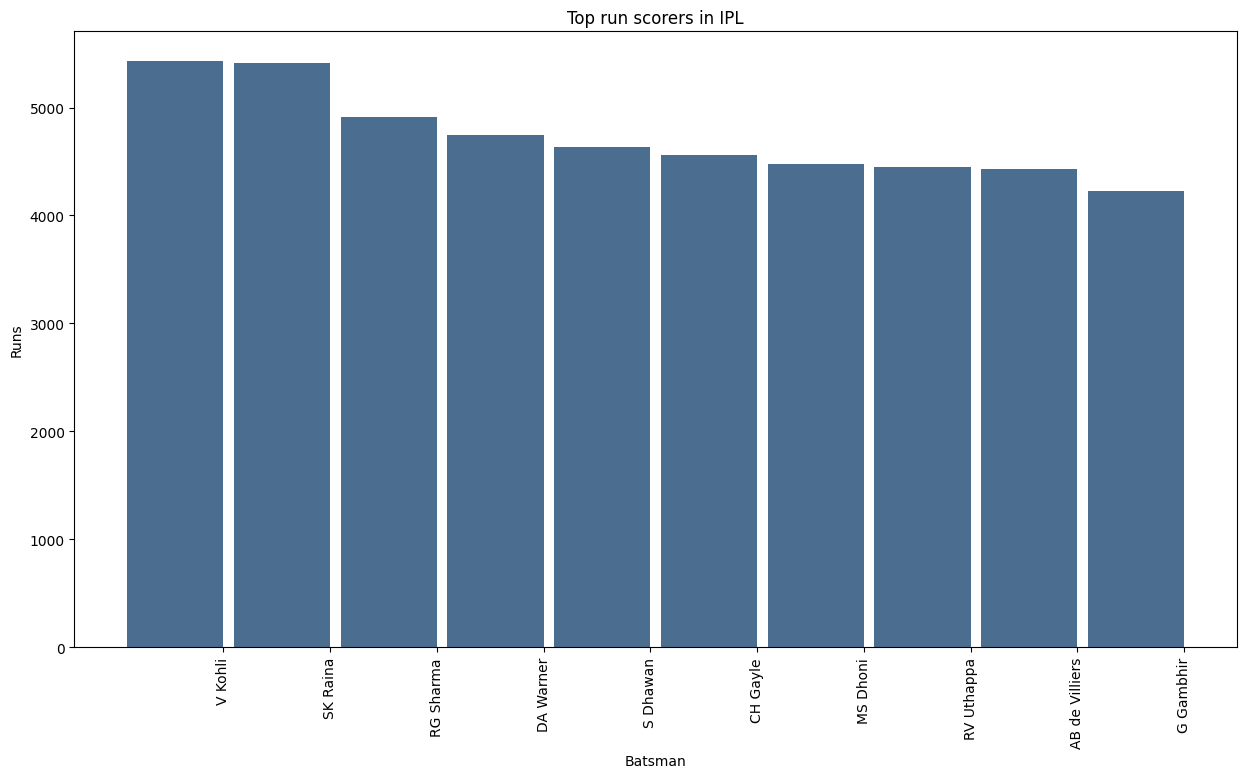

In [46]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='#4A6D90')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Runs")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsman')
plt.show()

# Most 4's

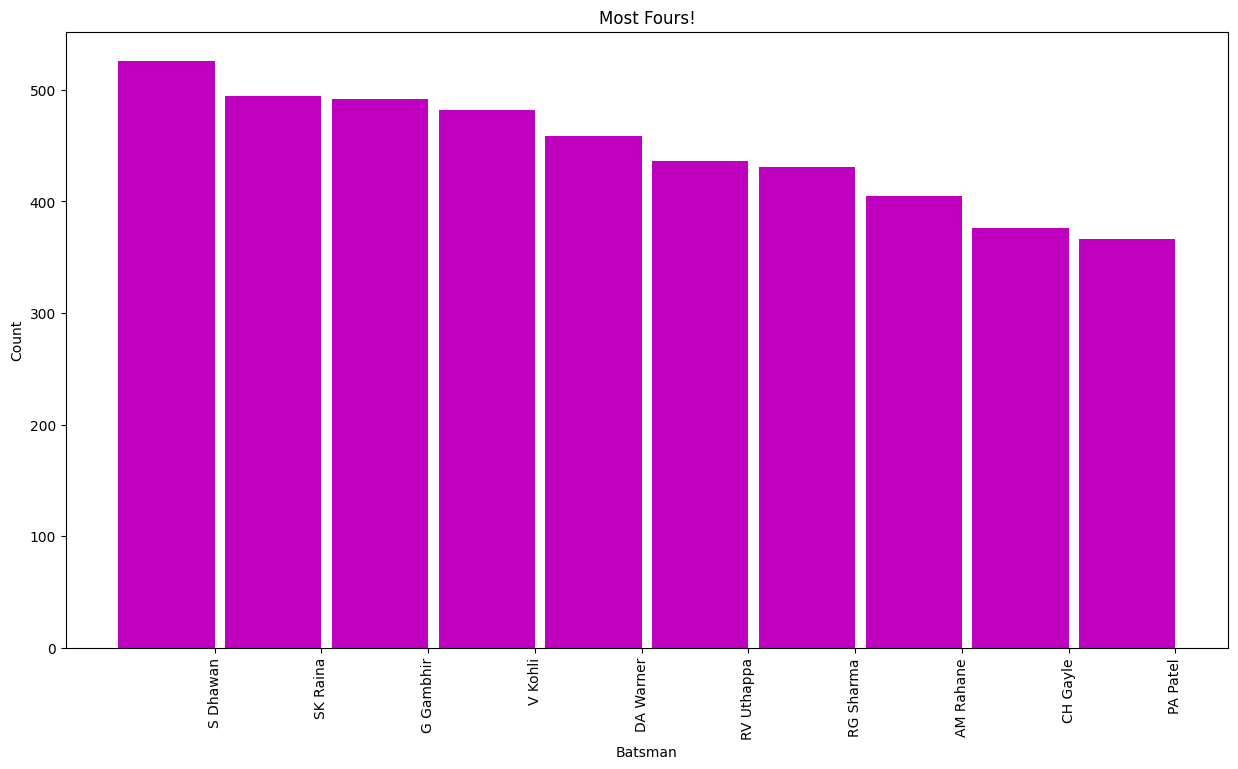

In [40]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count")
ax.set_title("Most Fours!")
ax.set_xlabel('Batsman')
plt.show()

# Most sixes 6's

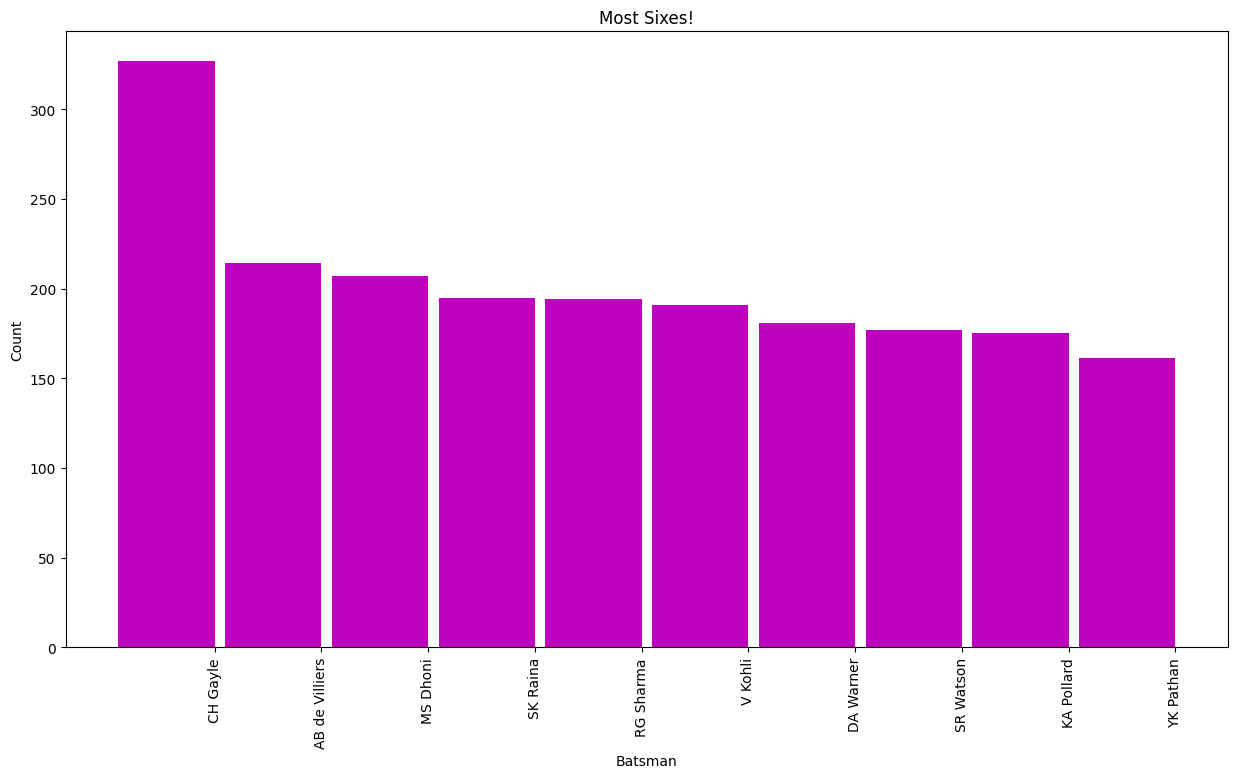

In [14]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count")
ax.set_title("Most Sixes!")
ax.set_xlabel('Batsman')
plt.show()

# Bowling Stats

# Top Wicket Takers all seasons

Text(0.5, 1.0, 'Top 10 Wicket Takers')

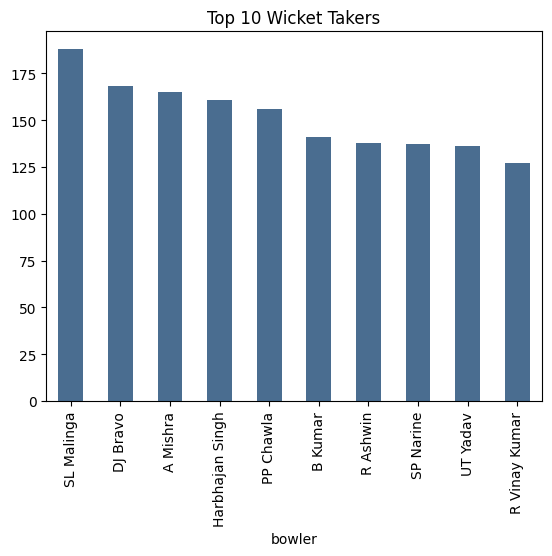

In [44]:
d=pd.merge(score_df,matches_df,left_on='match_id',right_on='id')#merging to datasets
d.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10).plot(kind='bar', color='#4A6D90')
plt.title("Top 10 Wicket Takers")

# Most Dot Balls delievered

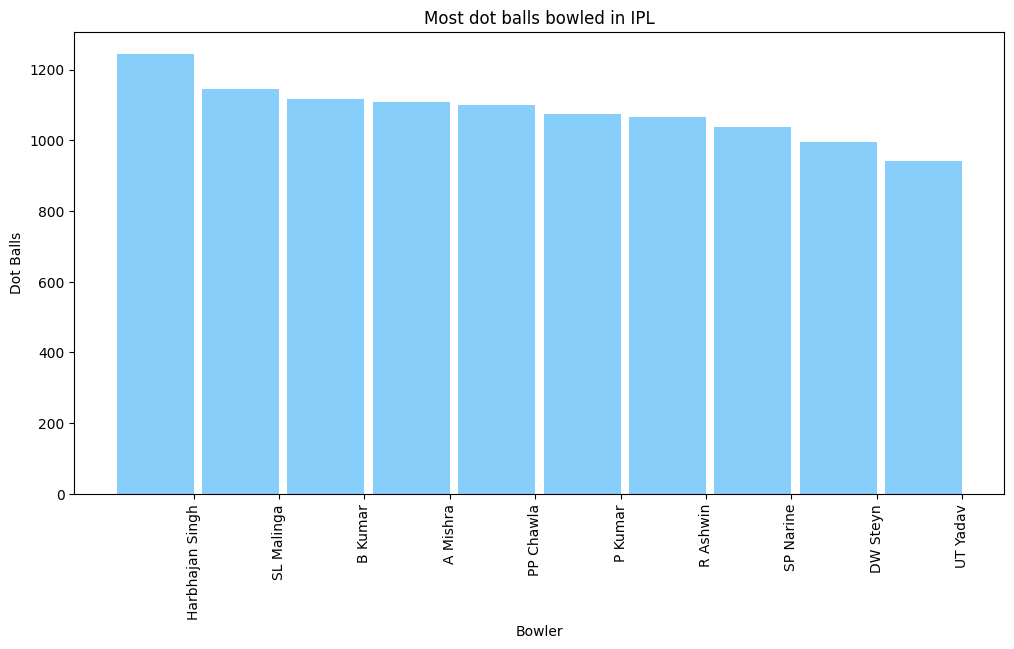

In [15]:
temp_df = score_df.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,6))
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Dot Balls")
ax.set_title("Most dot balls bowled in IPL")
ax.set_xlabel('Bowler')
plt.show()

# Player of the Matches

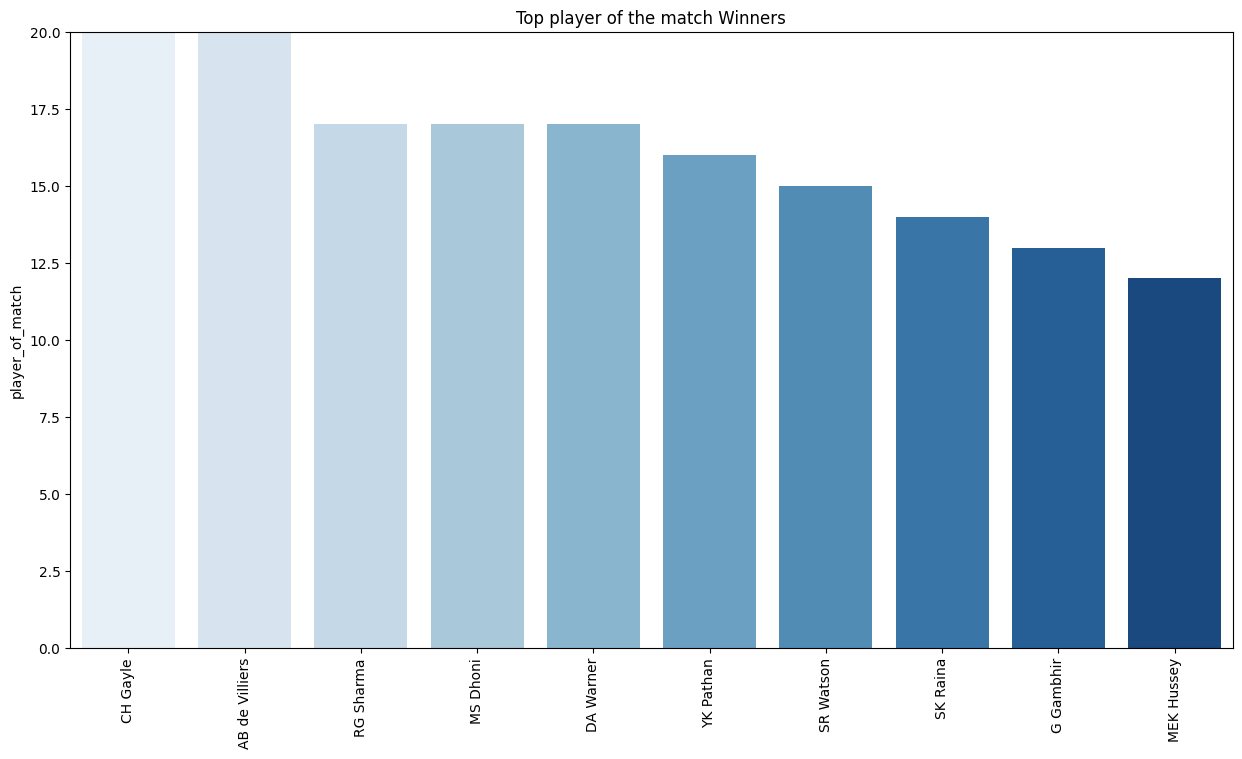

In [16]:
top_players = matches_df.player_of_match.value_counts()[:10]
#sns.barplot(x="day", y="total_bill", data=df)
fig, ax = plt.subplots(figsize=(15,8))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="Blues");
plt.show()

# Toss Decisions

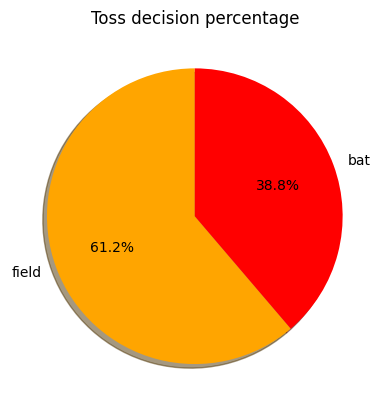

In [18]:
temp_series = matches_df.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['orange', 'red']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

# Most played venues

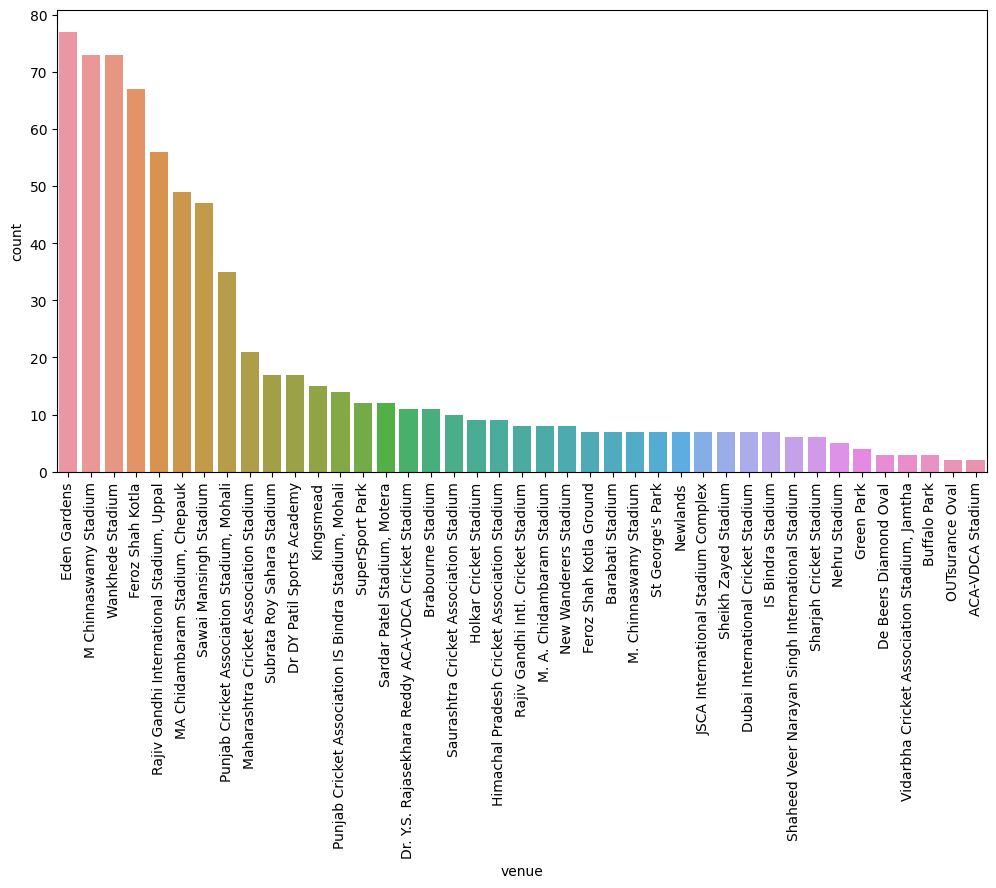

In [48]:
venue_counts = matches_df['venue'].value_counts()
sorted_venues = venue_counts.index.tolist()
plt.figure(figsize=(12, 6))
sns.countplot(x='venue', data=matches_df, order=sorted_venues)
plt.xticks(rotation='vertical')
plt.show()

# Observations

# Most Successful Teams:
    1.Mumbai Indians(4 Trophies with over all 109 wins)
    2.Chennai Super Kings(3 Trophies with over all 100 wins)
    3.Kolkata Knight Riders (2 Trophies with over all 92 wins)

# Most Successful Batsmen:
    According to most runs
    1.Virat Kohli
    2.Suresh Raina
    3.Rohit Sharma
    4.David Warner
    5.Shikar Dhawan
    6.Chris Gayle

# Most Successful Bowlers:
    According to wickets-taken
    1.SL Malinga
    2.DJ Bravo
    3.Amit Mishra
    4.Harbajan singh
    5.Piyush Chawla
    6.Bhuvaneshwar

# Powerful Hitters:
    According to most sixes
    1.Chris Gayle
    2.AB DE velliers
    3.MS Dhoni

# Economic Bowlers:
    According to most dot balls
    1.Harbajan Singh
    2.SL Malings
    3.Bhuvaneswar Kumar

# Factors for match winning:
    1.Teams that field first have higher percentage of winning the matches.
    2.In IPL finals, 9 out of 12 times the team that won the toss, has won the trophy.
    3.Having bowling side who can take wickets and deliver most dot balls has higher win percentage despite batting efforts.